# Bosques aleatorios 
## Elaborado por: Martín Ordóñez

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# Importar árboles de ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
X = df.loc[:, df.columns != 'target']

In [4]:
# Características Matrix debe ser bidimensional
X.shape

(569, 30)

In [5]:
y = df.loc[:, 'target'].values

### División entrenamiento prueba (validación del modelo)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [7]:
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [8]:
# Mirando algunos hiperparámetros que parecen ajustables
clf

RandomForestClassifier(oob_score=True)

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [10]:
# Predecir para una observación
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([1])

In [11]:
clf.predict(X_test[0:10])

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [12]:
clf.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [13]:
# El desequilibrio de clases no es tan extremo para nuestro conjunto de datos
# Dado que se requieren etiquetas de clase para determinar el grado de desequilibrio de clases,
#  la clase imblanace se mide típicamente con respecto a la distribución del entrenamiento.
pd.DataFrame(y_train)[0].value_counts(dropna = False)

1    267
0    159
Name: 0, dtype: int64

In [14]:
# Precisión nula al predecir la clase más frecuente
267 / (267 + 159)

0.6267605633802817

In [15]:
# calcular la precisión de clasificación para el modelo que se entrenó
score = clf.score(X_test, y_test)
score

0.9370629370629371

Dado que este modelo en particular tiene una precisión de aproximadamente el 94,4%. En comparación, la precisión nula fue del 62,7% para la división cuando se ejecutó el código. El modelo aporta algo de valor.

### Error de generalización (out-of-sample error)

Lo que hemos estado haciendo con la validación de modelos como la división entrenamiento prueba es calcular el error de generalización (una medida de precisión con la que un algoritmo puede predecir datos no vistos previamente).

Para modelos empaquetados como bagged trees, y bosques aleatorios, el error fuera de la muestra se puede estimar sin utilizar procedimientos de validación del modelo como la división entrenamiento prueba. Como se mencionó en secciones anteriores. En promedio, cada árbol que utilizó datos de arranque utiliza aproximadamente dos tercios de las observaciones. Para cada árbol, las observaciones restantes se denominan observaciones "fuera de bolsa".

#### Cómo calcular el error fuera de la bolsa

Para cada observación en los datos de entrenamiento, predice su valor de respuesta usando solo los árboles en los que esa observación estaba fuera de lugar. Promedia esas predicciones (para la regresión) o realiza una votación (para la clasificación).
Compara todas las predicciones con los valores de respuesta reales para calcular el error fuera de la bolsa.

In [16]:
clf.oob_score_

0.9694835680751174

#### Afinación de n_estimators (# de árboles de decisión)

In [17]:
# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 310, 10))

In [18]:
estimator_range

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

In [19]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

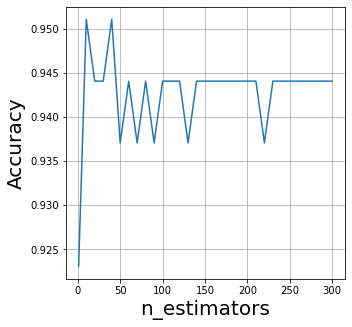

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()